In [1]:
from google.colab import files

# لرفع ملف البيانات
uploaded = files.upload()


Saving data.csv to data.csv


In [3]:
import pandas as pd

df = pd.read_csv('data.csv', encoding='latin1')

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# عرض معلومات عن الأعمدة وأنواع البيانات
df.info()
# عرض أسماء الأعمدة فقط
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# عدد القيم المفقودة في كل عمود
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
# حذف الصفوف التي لا تحتوي على وصف المنتج
df = df.dropna(subset=['Description'])


In [7]:
# التأكد من أن وصف المنتج أصبح بدون قيم مفقودة
df['Description'].isnull().sum()


np.int64(0)

In [8]:
# أكثر 10 منتجات مبيعًا حسب الكمية
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# عرض النتائج
print(top_products)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


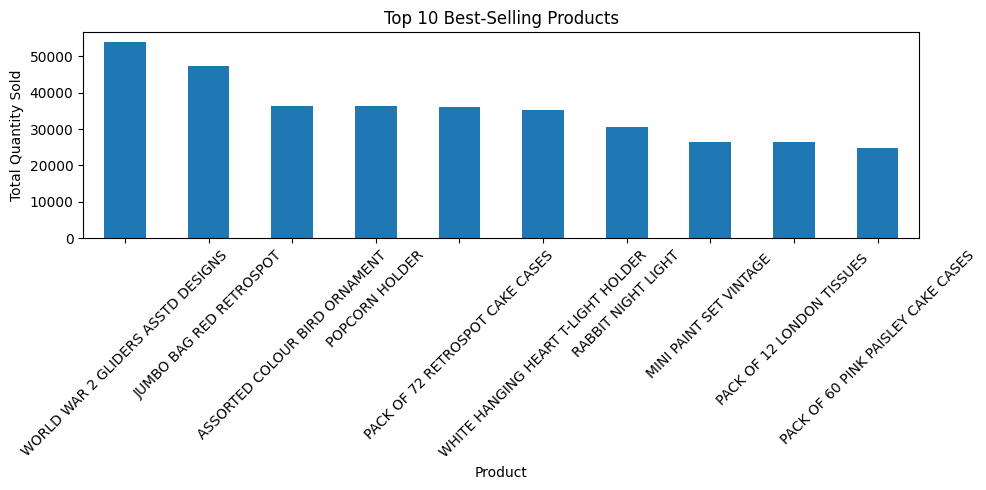

In [9]:
import matplotlib.pyplot as plt

# رسم شريطي
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# تحويل عمود التاريخ إلى نوع datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [11]:
# استخراج التاريخ فقط بدون الوقت
df['Date'] = df['InvoiceDate'].dt.date


In [12]:
# تجميع المبيعات حسب التاريخ
daily_sales = df.groupby('Date')['Quantity'].sum()

# عرض أول 10 أيام
daily_sales.head(10)


,Quantity
Date,
2010-12-01,26736
2010-12-02,21042
2010-12-03,15913
2010-12-05,16395
2010-12-06,21398
2010-12-07,25261
2010-12-08,22819
2010-12-09,18484
2010-12-10,20463


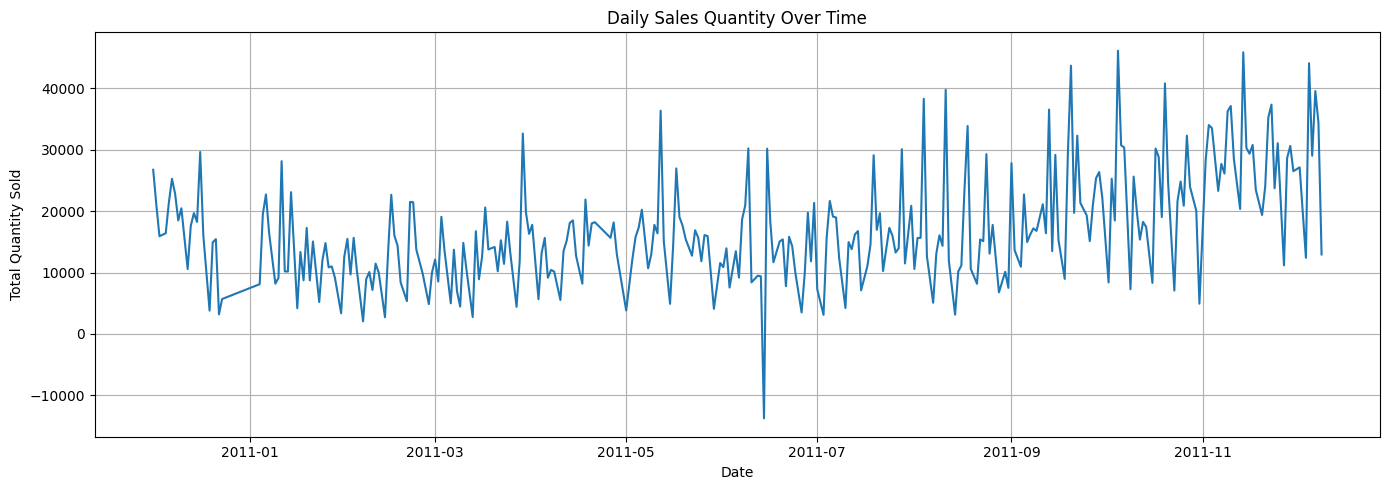

In [13]:
# رسم خطي للمبيعات اليومية
plt.figure(figsize=(14,5))
daily_sales.plot(kind='line', title='Daily Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# جمع الكميات المباعة حسب الدولة
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# عرض أول 10 دول فقط
top_countries = country_sales.head(10)
print(top_countries)


Country
United Kingdom    4277438
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


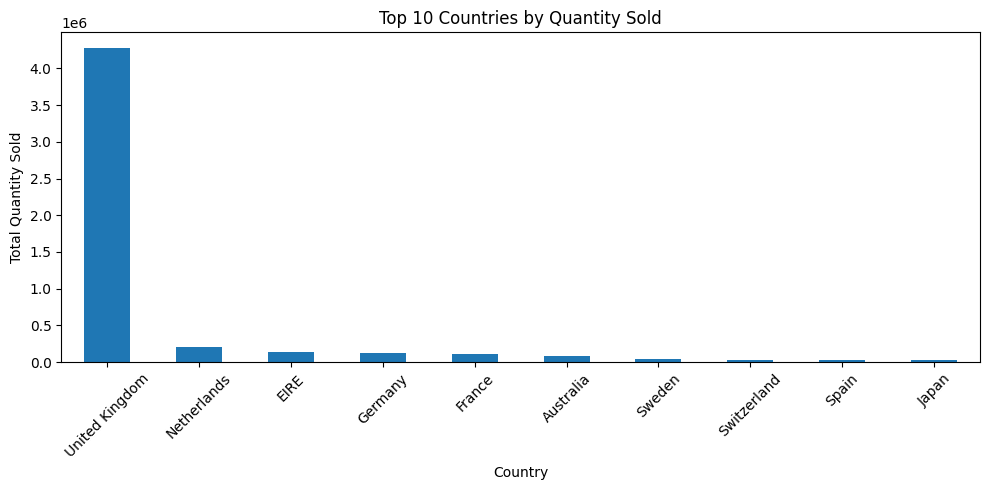

In [15]:
# رسم شريطي لأعلى 10 دول
top_countries.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# حذف الصفوف التي لا تحتوي على CustomerID
df_customers = df.dropna(subset=['CustomerID'])

# التأكد
df_customers['CustomerID'].isnull().sum()


np.int64(0)

In [17]:
# عدد الفواتير لكل عميل
orders_per_customer = df_customers.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

# عرض أول 10 عملاء من حيث عدد الطلبات
orders_per_customer.head(10)


,InvoiceNo
CustomerID,
14911.0,248
12748.0,224
17841.0,169
14606.0,128
15311.0,118
13089.0,118
12971.0,89
14527.0,86
13408.0,81


In [18]:
# إجمالي الكمية لكل عميل
quantity_per_customer = df_customers.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)

quantity_per_customer.head(10)


,Quantity
CustomerID,
14646.0,196719
12415.0,77242
14911.0,77180
17450.0,69029
18102.0,64122
17511.0,63012
13694.0,61803
14298.0,58021
14156.0,57025


In [19]:
# إنشاء عمود الإيرادات لكل صف
df_customers['Revenue'] = df_customers['Quantity'] * df_customers['UnitPrice']

# جمع الإيرادات لكل عميل
revenue_per_customer = df_customers.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)

revenue_per_customer.head(10)


/tmp/ipython-input-2569896257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['Revenue'] = df_customers['Quantity'] * df_customers['UnitPrice']


,Revenue
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
14156.0,113384.14
17511.0,88125.38
16684.0,65892.08
13694.0,62653.10


In [20]:
# إنشاء عمود الإيرادات لكل صف
df_customers['Revenue'] = df_customers['Quantity'] * df_customers['UnitPrice']

# جمع الإيرادات لكل عميل
revenue_per_customer = df_customers.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)

revenue_per_customer.head(10)


/tmp/ipython-input-2569896257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['Revenue'] = df_customers['Quantity'] * df_customers['UnitPrice']


,Revenue
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
14156.0,113384.14
17511.0,88125.38
16684.0,65892.08
13694.0,62653.10


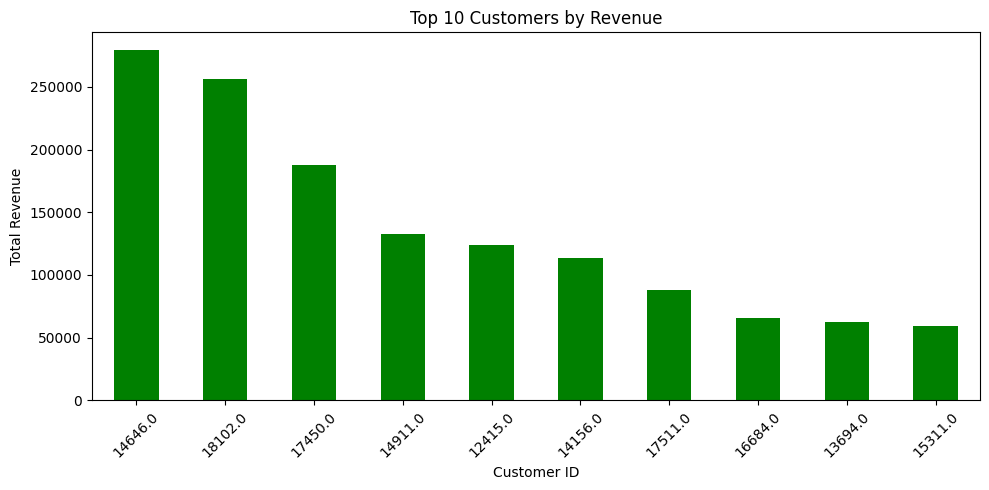

In [21]:
# اختيار أعلى 10 عملاء حسب الإيرادات
top_revenue = revenue_per_customer.head(10)

# رسم شريطي
top_revenue.plot(kind='bar', figsize=(10,5), color='green', title='Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


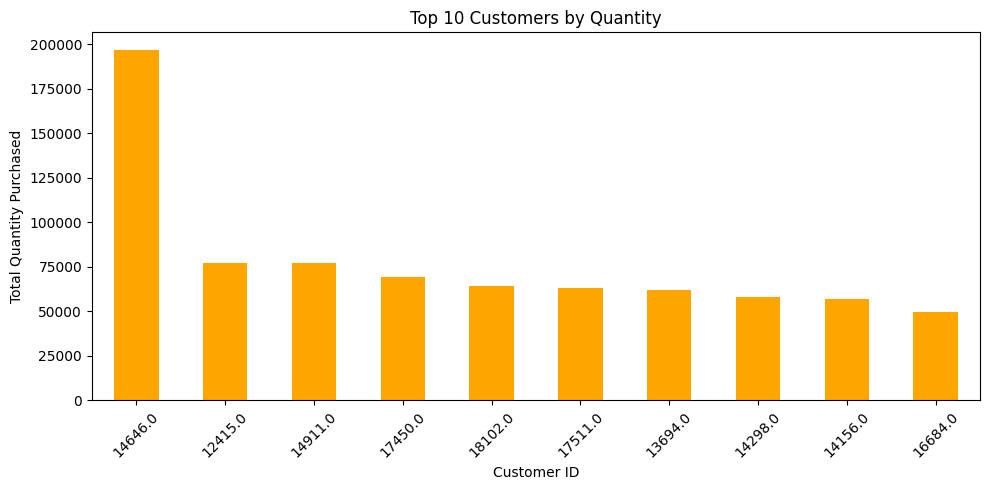

In [22]:
# اختيار أعلى 10 عملاء حسب الكمية
top_quantity = quantity_per_customer.head(10)

# رسم شريطي
top_quantity.plot(kind='bar', figsize=(10,5), color='orange', title='Top 10 Customers by Quantity')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
